# Exploring Eye Tracking Data with a Toy Example

## Import Statements 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

## Read the JSON file

In [2]:
filename = 'toy_data_5.json'
with open(filename, 'r') as j:
    tmp = json.loads(j.read())
    samples_df = pd.json_normalize(data=tmp, sep='_',)
    
samples_df = pd.concat(
    [samples_df.drop(columns=['hitInfos']), 
     pd.concat([pd.json_normalize(row, sep='_',) for row in samples_df['hitInfos']], ignore_index=True)
    ], 
    axis=1
)

samples_df['timestamp'] = pd.to_datetime(samples_df.timestamp, utc=True, unit='s', origin='unix')
samples_df.set_index('timestamp', inplace=True)

samples_df.head()

,leftValidityMask,leftDataGazeOriginValidity,leftDataGazeDirectionValidity,leftDataPupilDiameterValidity,leftDataEyeOpennessValidity,leftDataPupilPositionInSensorAreaValidity,rightValidityMask,rightDataGazeOriginValidity,rightDataGazeDirectionValidity,rightDataPupilDiameterValidity,...,EyeDirectionCombinedWorld_x,EyeDirectionCombinedWorld_y,EyeDirectionCombinedWorld_z,singleHitInfo_hitPosition_x,singleHitInfo_hitPosition_y,singleHitInfo_hitPosition_z,singleHitInfo_ObjectPosition_x,singleHitInfo_ObjectPosition_y,singleHitInfo_ObjectPosition_z,singleHitInfo_ObjectName
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-09-11 00:36:11.849033472+00:00,31,True,True,True,True,True,31,True,True,True,...,0.316221,-0.353435,0.880375,-1.896670,-2.390609e-16,7.936346,0.0,-2.220446e-16,7.17,Orange Floor
2021-09-11 00:36:11.861454848+00:00,31,True,True,True,True,True,31,True,True,True,...,0.316693,-0.352962,0.880402,-1.884416,-2.392218e-16,7.943593,0.0,-2.220446e-16,7.17,Orange Floor
2021-09-11 00:36:11.869997056+00:00,31,True,True,True,True,True,31,True,True,True,...,0.317304,-0.350035,0.881345,-1.850652,-2.403248e-16,7.993265,0.0,-2.220446e-16,7.17,Orange Floor
2021-09-11 00:36:11.878981632+00:00,31,True,True,True,True,True,31,True,True,True,...,0.316552,-0.350531,0.881421,-1.856269,-2.401659e-16,7.986111,0.0,-2.220446e-16,7.17,Orange Floor
2021-09-11 00:36:11.887991808+00:00,31,True,True,True,True,True,31,True,True,True,...,0.314961,-0.350752,0.881898,-1.866096,-2.401535e-16,7.985551,0.0,-2.220446e-16,7.17,Orange Floor


## Check Data types

In [3]:
samples_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9524 entries, 2021-09-11 00:36:11.849033472+00:00 to 2021-09-11 00:37:57.608784896+00:00
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   leftValidityMask                            9524 non-null   int64  
 1   leftDataGazeOriginValidity                  9524 non-null   bool   
 2   leftDataGazeDirectionValidity               9524 non-null   bool   
 3   leftDataPupilDiameterValidity               9524 non-null   bool   
 4   leftDataEyeOpennessValidity                 9524 non-null   bool   
 5   leftDataPupilPositionInSensorAreaValidity   9524 non-null   bool   
 6   rightValidityMask                           9524 non-null   int64  
 7   rightDataGazeOriginValidity                 9524 non-null   bool   
 8   rightDataGazeDirectionValidity              9524 non-null   bool   
 9   rightDataPupilDia

## Start Plotting!

In [48]:
def at_mad(angular_vel, th_0 = 200):
    threshs = []
    if len(angular_vel.shape) == 1:
        angular_vel = angular_vel[:,None]
    while True:
        threshs.append(th_0)
        angular_vel = angular_vel[angular_vel < th_0]
        median = np.median(angular_vel)
        diff = (angular_vel - median)**2
        diff = np.sqrt(diff)
        med_abs_deviation = np.median(diff)
        th_1 = median + 3*1.48*med_abs_deviation
#         print(th_0, th_1)
        if (th_0 - th_1)>1:
            th_0 = th_1
        else:
            saccade_thresh = th_1
            threshs.append(saccade_thresh)
            break
    return saccade_thresh, threshs

In [4]:
# Create dict for staircase Plot
obj_dict = dict(zip(samples_df.singleHitInfo_ObjectName.unique(), np.arange(samples_df.singleHitInfo_ObjectName.nunique())))
obj_dict

{'Orange Floor': 0,
 'Cube': 1,
 'Pole': 2,
 'Rail (3)': 3,
 'Rail (6)': 4,
 'GreenFloor': 5,
 'Blue Capsule': 6,
 'Black Cylinder': 7,
 'Blue Floor': 8,
 'Blue Wall': 9,
 'Rail': 10,
 'Red Wall': 11,
 'Red Capsule': 12,
 'GreenCube': 13,
 'Rail (4)': 14,
 'RedFloor': 15,
 'Red Cube': 16,
 'Rail (5)': 17,
 'Platform': 18,
 'Orange Wall': 19,
 'Green Wall': 20,
 'Blue Sphere': 21,
 'Blue Cylinder': 22,
 'Glas': 23,
 'Green Sphere': 24,
 'Rail (2)': 25,
 'OrangeCube': 26,
 'Orange Sphere': 27,
 'Rail (1)': 28,
 'Rail (7)': 29}

<ipython-input-7-9edf932a4af5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['obj_id'] = tmpdf.singleHitInfo_ObjectName.map(obj_dict)


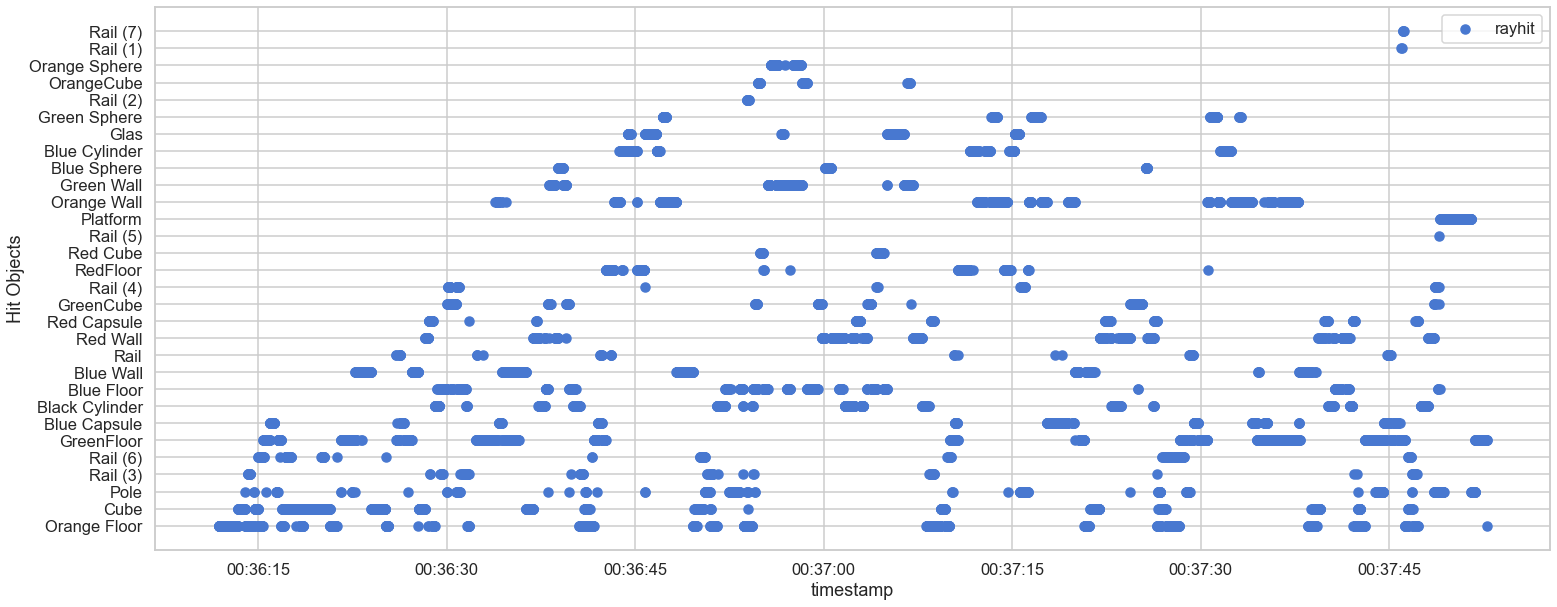

In [7]:
## Choose only valid samples
tmpdf = (
    samples_df
    .query('leftValidityMask == 31 and rightValidityMask == 31')
)

tmpdf['obj_id'] = tmpdf.singleHitInfo_ObjectName.map(obj_dict)


sns.set(context = "talk", style="whitegrid", palette="muted", font_scale=1, rc={'figure.figsize':(11.7,8.27)})
_, ax = plt.subplots(figsize=(25,10))

ax.scatter(tmpdf.index, tmpdf['obj_id'], label='rayhit', marker='o')

ax.legend()
ax.set(
    yticks=list(obj_dict.values()),
    yticklabels=obj_dict.keys(),
    ylabel='Hit Objects',
    xlabel='timestamp'
);

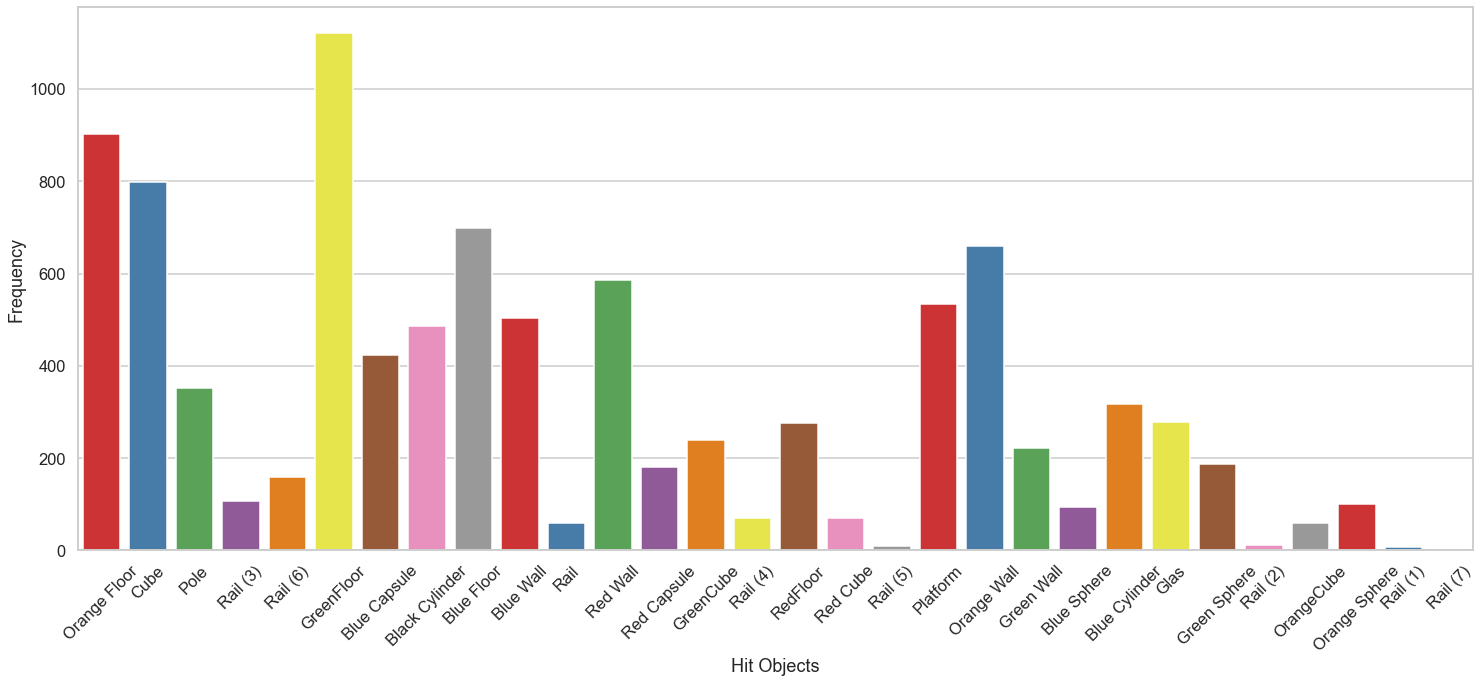

In [8]:
_, ax = plt.subplots(figsize=(25,10))

ax = sns.countplot(data=samples_df, x='singleHitInfo_ObjectName', palette='Set1')
ax.set(
    xlabel='Hit Objects',
    ylabel='Frequency'
)
plt.xticks(rotation=45);

In [9]:

samples_df['theta_h'] = np.arctan2(samples_df.EyeDirectionCombinedWorld_x, samples_df.EyeDirectionCombinedWorld_z)
samples_df['theta_v'] = np.arctan2(samples_df.EyeDirectionCombinedWorld_y, samples_df.EyeDirectionCombinedWorld_z)

samples_df['time'] = samples_df.index
samples_df['time_delta'] = samples_df.time - samples_df.time.shift()
samples_df['time_delta'] = samples_df.time_delta.apply(lambda x: x/np.timedelta64(1,'s'))

samples_df['eye_velocity_h'] = samples_df.theta_h.diff()/samples_df.time_delta
samples_df['eye_velocity_v'] = samples_df.theta_v.diff()/samples_df.time_delta

samples_df['eye_velocity_mag'] = np.sqrt(samples_df.eye_velocity_h**2 + samples_df.eye_velocity_v**2 )

In [10]:

samples_df['head_theta_h'] = np.arctan2(samples_df.noseVector_x, samples_df.noseVector_z)
samples_df['head_theta_v'] = np.arctan2(samples_df.noseVector_y, samples_df.noseVector_z)

samples_df['head_velocity_h'] = samples_df.head_theta_h.diff()/samples_df.time_delta
samples_df['head_velocity_v'] = samples_df.head_theta_v.diff()/samples_df.time_delta

samples_df['head_velocity_mag'] = np.sqrt(samples_df.head_velocity_h**2 + samples_df.head_velocity_v**2 )

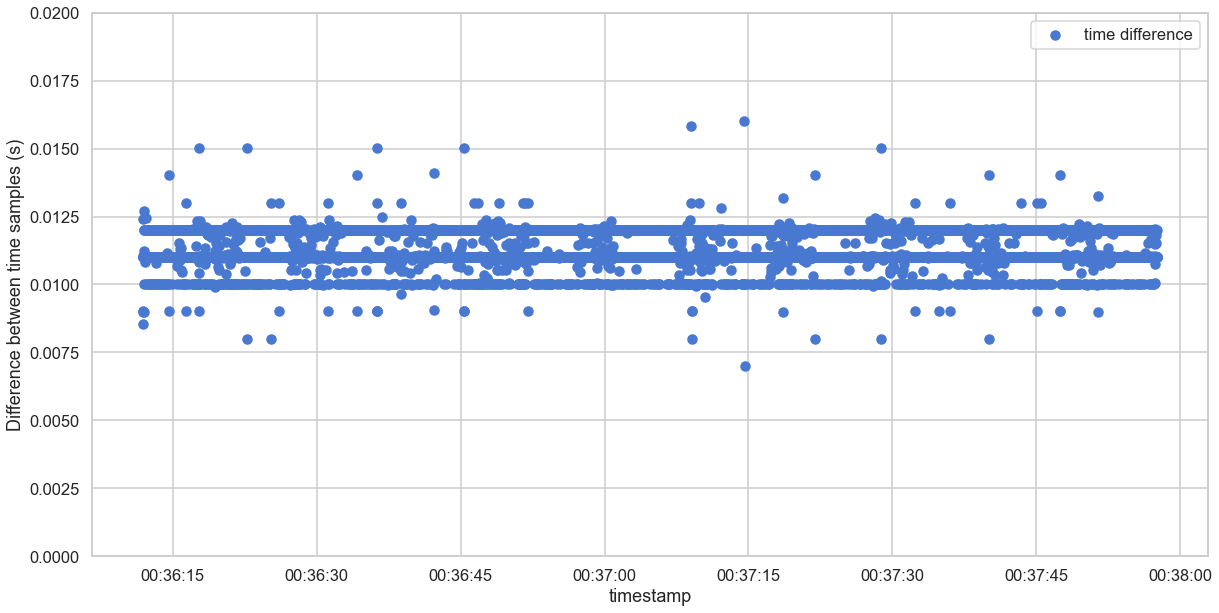

In [24]:
_, ax = plt.subplots(figsize=(20,10))

ax.scatter(samples_df.index, samples_df.time_delta, label='time difference')
# ax.plot(samples_df.index, samples_df.eye_velocity_h, color='r', )
# ax.plot(samples_df.index, samples_df.eye_velocity_v, color='g', )

ax.legend()
ax.set(
    ylim=(0,0.02),
    xlabel='timestamp',
    ylabel='Difference between time samples (s)'
);

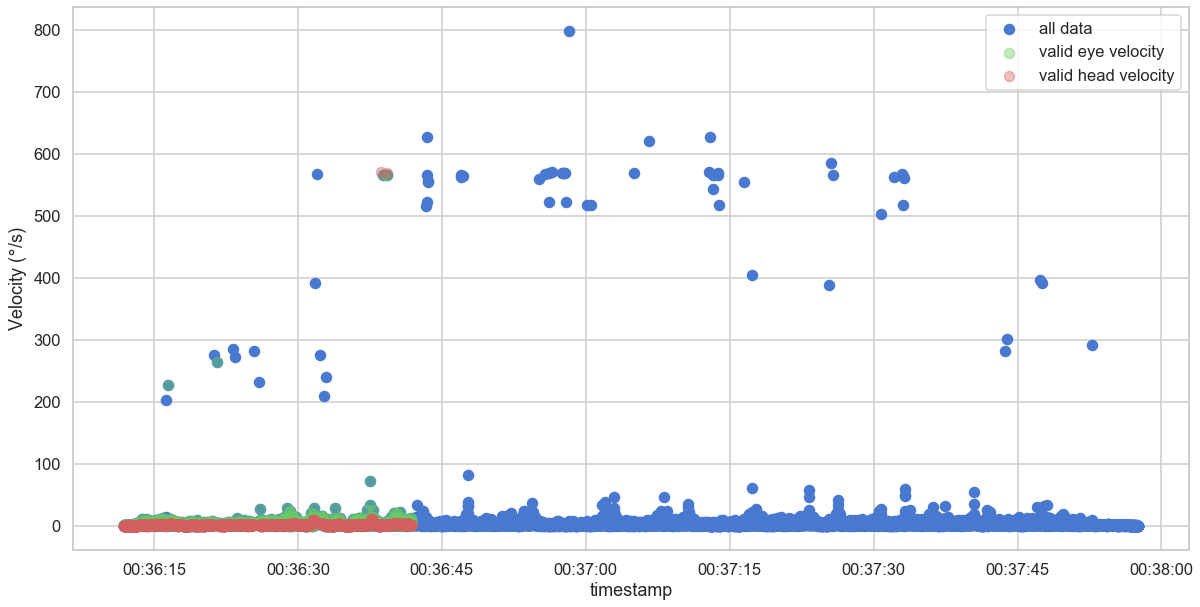

In [37]:
_, ax = plt.subplots(figsize=(20,10))

ax.scatter(samples_df.index, samples_df.eye_velocity_mag, label='all data', color='b', s=100)

samples_df['time_from_start'] = (samples_df.index - samples_df.index[0])/np.timedelta64(1, 's')
tmpdf = (
    samples_df
    .query('leftValidityMask == 31 and rightValidityMask == 31')
#     .query('time_from_start <=30')
)
ax.scatter(tmpdf.index, tmpdf.eye_velocity_mag, label='valid eye velocity', color='g', alpha=0.4, s=100)

ax.scatter(tmpdf.index, tmpdf.head_velocity_mag, label='valid head velocity', color='r', alpha=0.4, s=100)

# ax.plot(samples_df.index, samples_df.eye_velocity_h, color='r', )
# ax.plot(samples_df.index, samples_df.eye_velocity_v, color='g', )

ax.legend()
ax.set(
    xlabel='timestamp',
    ylabel=r'Velocity ($\degree$/s)'
);

<ipython-input-48-bb4bf1efff21>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  angular_vel = angular_vel[:,None]


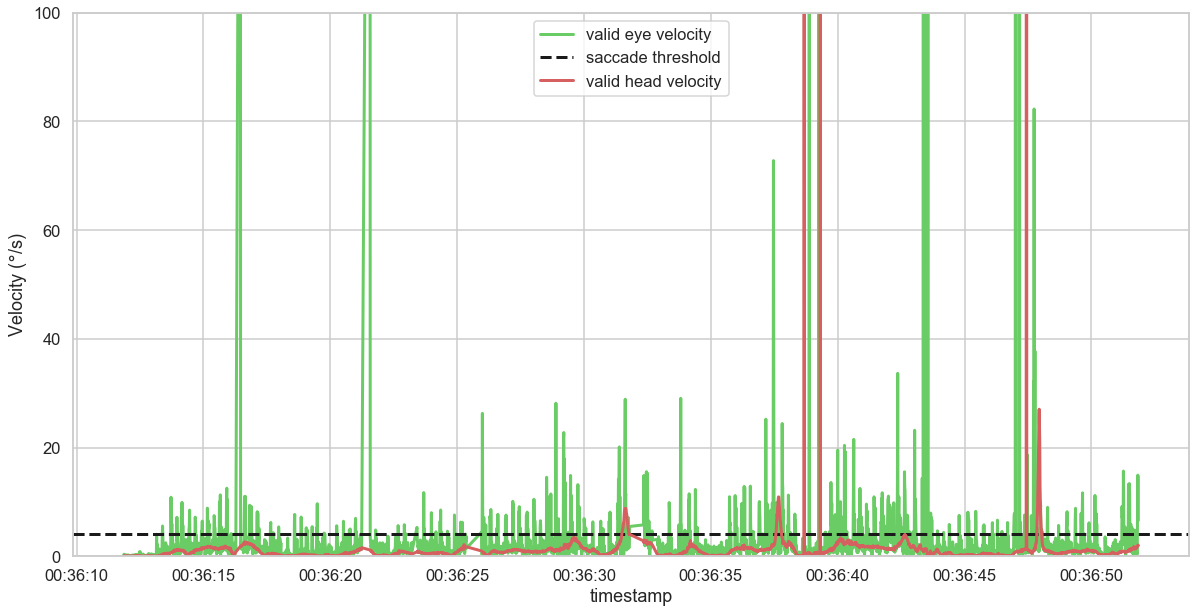

In [49]:
_, ax = plt.subplots(figsize=(20,10))

# ax.plot(samples_df.index, samples_df.eye_velocity_mag, label='all data', color='b',ls=':')

tmpdf = (
    samples_df
    .query('leftValidityMask == 31 and rightValidityMask == 31')
    .query('time_from_start <= 40')
)
ax.plot(tmpdf.index, tmpdf.eye_velocity_mag, label='valid eye velocity', color='g', lw=3)
saccade_thresh, threshs = at_mad(tmpdf.eye_velocity_mag)
ax.axhline(saccade_thresh, ls='--', lw=3, color='k', label='saccade threshold')
ax.plot(tmpdf.index, tmpdf.head_velocity_mag, label='valid head velocity', color='r', lw=3)

# ax.plot(samples_df.index, samples_df.eye_velocity_h, color='r', )
# ax.plot(samples_df.index, samples_df.eye_velocity_v, color='g', )

ax.legend()
ax.set(
    ylim=(0,100),
    xlabel='timestamp',
    ylabel=r'Velocity ($\degree$/s)'
);